In [1]:
# This example illustrates the lens effect by multiple lens planes

In [2]:
# Load some module and set some defaults
%matplotlib inline
import grale.images as images
import grale.lenses as lenses
import grale.cosmology as cosmology
import grale.plotutil as plotutil
import grale.multiplane as multiplane
import grale.renderers as renderers
import grale.feedback as feedback
from grale.constants import *
import numpy as np
import matplotlib.pyplot as plt

cosm = cosmology.Cosmology(0.7, 0.3, 0, 0.7)
V = lambda x,y: np.array([x,y], dtype=np.double)
LI = plotutil.LensInfo

plotutil.setDefaultAngularUnit(ANGLE_ARCSEC)
renderers.setDefaultLensPlaneRenderer("threads")
feedback.setDefaultFeedback("none")

In [3]:
# For a simple test, let's use two point mass lenses at these locations
lensPos1 = V(0,0)*ANGLE_ARCSEC
lensPos2 = V(4,7)*ANGLE_ARCSEC

z1 = 0.5
D1 = cosm.getAngularDiameterDistance(z1)
tmp = lenses.PointmassLens(D1, { "mass": 1e14*MASS_SUN })
l1 = lenses.CompositeLens(D1, [{ "lens": tmp, "factor": 1, "angle": 0, "x": lensPos1[0], "y": lensPos1[1]}])

z2 = 1.5
D2 = cosm.getAngularDiameterDistance(z2)
tmp = lenses.PointmassLens(D2, { "mass": 2e13*MASS_SUN })
l2 = lenses.CompositeLens(D2, [{ "lens": tmp, "factor": 1, "angle": 0, "x": lensPos2[0], "y": lensPos2[1]}])

In [4]:
# Let's prepare to create a mapping for a source at z_s = 1.75
zs = 1.75

lensInfo = LI(lens=[(l1, z1), (l2, z2)], zs=zs, size=60*ANGLE_ARCSEC, numxy=1023, cosmology=cosm)

In [5]:
# Using a circular source shape at (5", 5")
src = images.CircularSource(V(5,5)*ANGLE_ARCSEC, 1.5*ANGLE_ARCSEC, 1, True)

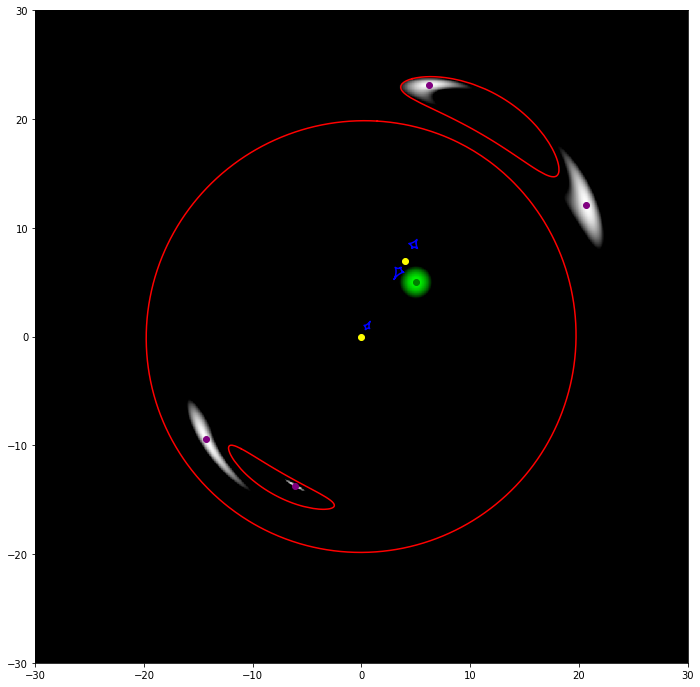

In [6]:
# Create a plot of the images, source and critical lines/caustics
plt.figure(figsize=(12,12))
plotutil.plotImagePlane(lensInfo, [src])

# Plot the positions of the point mass lenses
plt.plot([lensPos1[0]/ANGLE_ARCSEC],[lensPos1[1]/ANGLE_ARCSEC], 'o', color='yellow')
plt.plot([lensPos2[0]/ANGLE_ARCSEC],[lensPos2[1]/ANGLE_ARCSEC], 'o', color='yellow')

# Calculate the image positions that correspond to the source center; we'll filter
# some highly demagnified images
ip = lensInfo.getImagePlane()
imgPos = np.array([ pos for pos in ip.traceBetaApproximately(src.getAngularPosition()) if abs(ip.getInverseMagnificationApproximately(np.array(pos))) < 1000 ])/ANGLE_ARCSEC
plt.plot(imgPos[:,0], imgPos[:,1], 'o', color='purple')

# Also plot the source position itself
srcPos = np.array(src.getAngularPosition())/ANGLE_ARCSEC
plt.plot(srcPos[0], srcPos[1], 'o', color='green');

In [7]:
# In this animation we're going to let the redshift of the source vary from
# 0 to 4.
class MyAnim(plotutil.NotebookAnimation):
    def __init__(self, numFrames):
        super(MyAnim, self).__init__("multiplelensplanetest.mp4", [0], [4], numFrames, 15)

    def onInit(self, axes):
        pass

    def onDraw(self, pos, axes):
        zs = pos[0]

        lensInfo.setSourceRedshift(zs)
        
        # This code is nearly the same as the code above, but here we're drawing to
        # the 'axes' object that's passed to the function.
        axes.clear()
        
        plotutil.plotImagePlane(lensInfo, [src], axes=axes, plotSources=False, feedbackObject="none")
        axes.plot([lensPos1[0]/ANGLE_ARCSEC],[lensPos1[1]/ANGLE_ARCSEC], 'o', color='yellow')
        axes.plot([lensPos2[0]/ANGLE_ARCSEC],[lensPos2[1]/ANGLE_ARCSEC], 'o', color='yellow')

        ip = lensInfo.getImagePlane()
        imgPos = np.array([ pos for pos in ip.traceBetaApproximately(src.getAngularPosition()) if abs(ip.getInverseMagnificationApproximately(np.array(pos))) < 1000 ])/ANGLE_ARCSEC
        axes.plot(imgPos[:,0], imgPos[:,1], 'o', color='purple')

        srcPos = np.array(src.getAngularPosition())/ANGLE_ARCSEC
        axes.plot(srcPos[0], srcPos[1], 'o', color='green')
        
        axes.set_title("z_s = {:.2f}".format(zs))

In [8]:
# This actually creates the animation
plt.figure(figsize=(12,12))
anim = MyAnim(400)

FloatProgress(value=1.0, max=400.0, min=1.0)

Text(value='')